# Nolan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")
print(df)

      incident_id    incident_date         state  city_or_county  \
0         2015849      May 26 2021      Illinois         Chicago   
1         2015730      May 26 2021    California        San Jose   
2         2014343      May 24 2021      Michigan         Inkster   
3         2014381      May 24 2021          Ohio  West Jefferson   
4         2012971      May 23 2021      Illinois         Chicago   
...           ...              ...           ...             ...   
2925        95550  January 12 2014       Alabama      Huntsville   
2926        95146  January 11 2014   Mississippi         Jackson   
2927        94514   January 5 2014  Pennsylvania            Erie   
2928        92704   January 3 2014      New York          Queens   
2929        92194   January 1 2014      Virginia         Norfolk   

                                            address  killed  injured  
0                     7200 block of S Princeton Ave       0        4  
1                                 101 W Y

In [ ]:
df.shape

(2930, 7)

In [ ]:
df.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2015849,May 26 2021,Illinois,Chicago,7200 block of S Princeton Ave,0,4
1,2015730,May 26 2021,California,San Jose,101 W Younger Ave,10,0
2,2014343,May 24 2021,Michigan,Inkster,27000 block of Rosewood St,2,2
3,2014381,May 24 2021,Ohio,West Jefferson,127 Jackson St,4,0
4,2012971,May 23 2021,Illinois,Chicago,3344 W Ohio St,0,4


In [ ]:
df.columns

Index(['incident_id', 'incident_date', 'state', 'city_or_county', 'address',
       'killed', 'injured'],
      dtype='object')

In [ ]:
df.nunique(axis=0)

incident_id       2930
incident_date     1571
state               48
city_or_county     861
address           2903
killed              19
injured             26
dtype: int64

In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,incident_id,killed,injured
count,2930.000000,2930.000000,2930.000000
mean,1099381.767918,1.072696,4.188055
std,587470.802438,2.156834,8.395836
min,92194.000000,0.000000,0.000000
25%,575898.750000,0.000000,3.000000
50%,1143329.500000,1.000000,4.000000
75%,1678961.750000,1.000000,5.000000
max,2015849.000000,59.000000,441.000000


In [ ]:
df_cleaned = df.copy().drop(['incident_id', 'address'], axis=1)
df_cleaned

,incident_date,state,city_or_county,killed,injured
0,May 26 2021,Illinois,Chicago,0,4
1,May 26 2021,California,San Jose,10,0
2,May 24 2021,Michigan,Inkster,2,2
3,May 24 2021,Ohio,West Jefferson,4,0
4,May 23 2021,Illinois,Chicago,0,4
...,...,...,...,...,...
2925,January 12 2014,Alabama,Huntsville,0,5
2926,January 11 2014,Mississippi,Jackson,0,4
2927,January 5 2014,Pennsylvania,Erie,1,3
2928,January 3 2014,New York,Queens,1,3


In [ ]:
df_cleaned = df_cleaned[df_cleaned['killed'].between(0, 15)]
df_cleaned = df_cleaned[df_cleaned['injured'].between(0, 20)]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,killed,injured
count,2921.000000,2921.000000
mean,1.007189,3.981171
std,1.455369,1.949356
min,0.000000,0.000000
25%,0.000000,3.000000
50%,1.000000,4.000000
75%,1.000000,5.000000
max,13.000000,19.000000


In [ ]:
def clean_month(row):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month = [m for m in months if(m in row.incident_date)]
    return month[0];

def clean_year(row):
    years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
    year = [y for y in years if(y in row.incident_date)]
    return int(year[0])

def clean_df(playlist):
    df_cleaned = df.copy()
    
    df_cleaned['month'] = df_cleaned.apply(lambda row: clean_month(row), axis=1)
    df_cleaned['year'] = df_cleaned.apply(lambda row: clean_year(row), axis=1)
    df_cleaned = df_cleaned.drop(['city_or_county'], axis=1)
    
    df_cleaned = df_cleaned[df_cleaned['year'] < 2021]
    
    df_cleaned = df_cleaned[['year', 'month', 'state', 'killed', 'injured']]
    return df_cleaned

df_cleaned = clean_df(df_cleaned)
df_cleaned

,year,month,state,killed,injured
232,2020,December,Indiana,1,3
233,2020,December,Oregon,0,4
234,2020,December,Illinois,3,3
235,2020,December,Florida,2,2
236,2020,December,Massachusetts,1,5
...,...,...,...,...,...
2925,2014,January,Alabama,0,5
2926,2014,January,Mississippi,0,4
2927,2014,January,Pennsylvania,1,3
2928,2014,January,New York,1,3


- with the above information, we are able to see various statistical values regarding the data in out dataset

(-1.0, 26.0)

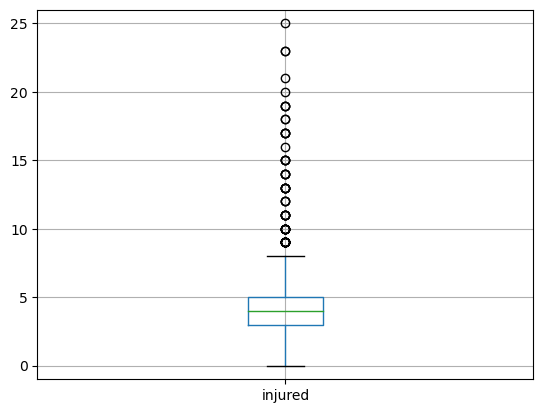

In [ ]:
df_cleaned.boxplot('injured')
plt.ylim(-1, 26)

## Meaning of the Above Boxplot
- All of the different elements of the box plot gives us different statistical values that we can use to make a judgement about the data, with these different statistical values including things such as the mean, quartile ranges, and outliers
- From the above boxplot, we can estimate that the mean for the number of people injured using the green line in the middle of the box on the boxplot. With this, we can determine that the mean is somwhere in the range of 3.5-4. We can confirm this by looking at the values in one of the above functions that says the mean is 3.98 people injured
- We can also use the boxplot to determine the range of where most of the data is. Using the lines on the ends of the boxplot we can determine that the most of the cases have a number of people injured in the range from 0 to just over 7.5
- Finally, we can also look at the circles on the box plot to determine some of the outliers in the data, ie data that doesn't fall reasonably within the range of values that we have. On this graph, all of the outliers are are shown to be above the 75 percent quartile range, with the smallest outlier being around 9 people injured and the largest outlier being around 25 people injured

(-1.0, 14.0)

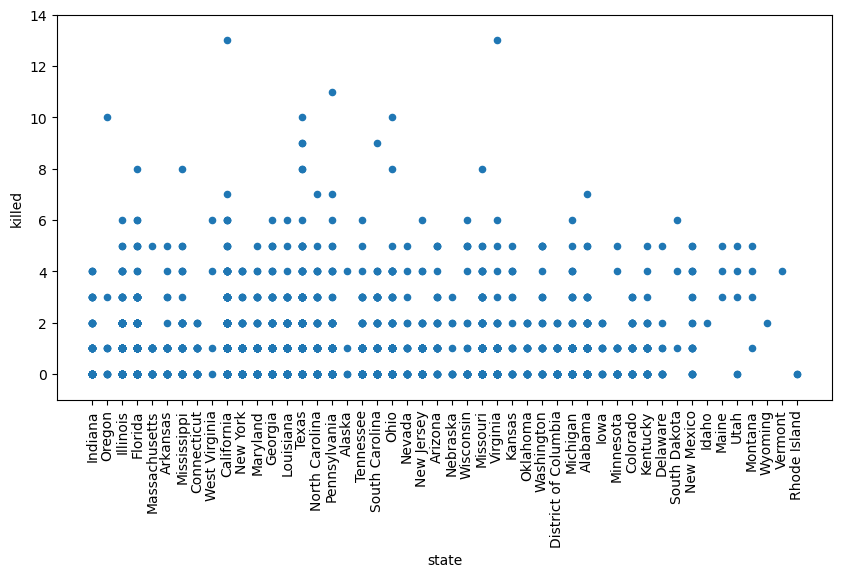

In [ ]:
df_cleaned.plot(kind='scatter', figsize=(10, 5), x='state', y='killed', rot=90)
plt.ylim(-1, 14)

## Meaning of the above Scatter Plot
- When using a scatter plot, we are able to see the relationship of the two quantaties on the two axis, and each point on the graph represents 1 of the incidents that displays this correspondance. 
- In the case for the above scatter plot, the relationship that we are looking at is the relationship between the number of people killed in mass shootings in correspondance with the states that these shootings take place in
- As we can see, there are a lot of states that have somewhat similar levels of shootings, but even with this similarity we are able to determine which cases have more or less shootings based on the number of dots for each state. For example, we can conclude that during the time period that the data was collected, the states that had the lowest number of people killed as a result of mass shootings weree Rhode Island, Idaho, and Vermont. 
- In contrast, we can also find the states that had the most people killed in mass shootings in the time period this data was collected. From looking at the points, it can be determined that the states that meet this criteria are California and Texas
#### IMPORTANT NOTE
- I believe that it is important to mention that even though we can make well formed educated guesses about the data from this scatterplot, these guesses are still going to be far from perfect without the data sources. 
- One such reason for this is that this graph does not show the number of times a dot has been placed at a given location in the data. For example, if you were to look at Idaho on the scatter plot, it would appear that they only had one mass shooting resulting in 2 peoples deaths. However, there may be multiple different cases of mass shootings in Idaho where 2 people died, and this results in the dots for this data all being placed on the same spot, skewing the way that people percieve the graph
- Mainly for this reason, while I do think that this graph is good and provides us with valuable information, without the presence of other data as well, it is hard to actually make a reasonable assumption about the data. 

(-1.0, 20.0)

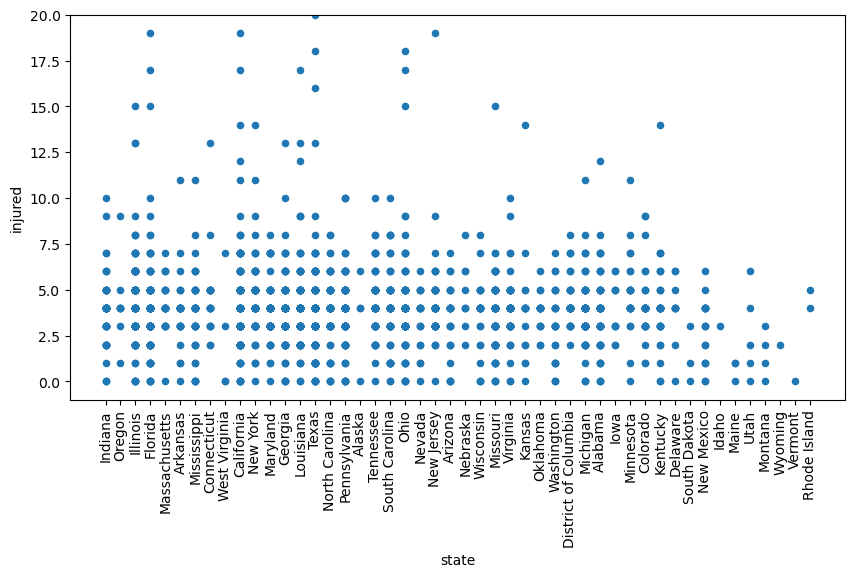

In [ ]:
df_cleaned.plot(kind='scatter', figsize=(10, 5), x='state', y='injured', rot=90)
plt.ylim(-1, 20)

## Meaning of the above Scatter Plot
- Just like the scatter plot earlier, this graph shows us the correlation between 2 quantities of our data set on the two axis. The difference this time is that the y axis now corresponds to the number of people killed rather than the number of people injured

## IMPORTANT NOTE
- Also just like the earlier scatter plot, even though we are able to make some educated guesses because of this scatter plot, the one scatterplot is far from perfect, and without other information accompanying this scatter plot, we are unable to make reasonable assumptions about the data

## Research question/interests

Briefly describe your research question or interests here.